In [1]:
%matplotlib inline

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Kaggle Recap and Review

by Nicholas Lai, Danielle Sugrue, and Nichole Sun

Maintained by the Statistics Undergraduate Student Association at UC Berkeley

# INSERT KAGGLE 1 RECAP HERE

## Topics in Regression

### Ridge Regression

Ordinary Least Squares regression methods are only interested in minimising one thing, the Residual Sum of Squares, or $RSS$. This approach has many problems that come up in practical applications, such as being highly sensitive to multicolinearity (if multiple variables give the same info, the variance of your estimates skyrocket) and differences between your training data and your testing data (variance). 

Ridge Regression is a way of dealing with these issues by penalizing large regression coefficients. Large regression coefficients mean that the model "believes" in a strong relationship between the response variable and the explanatory variable. By penalizing large values of regression coefficients, we are telling the model to slow its roll, and to not put as much store in the training data as OLS does. 

Ridge regression minimises: 
$$RSS + \sum_{i\neq0}\lambda\hat{\beta_{i}^2}$$

Where $\lambda$ is some constant. The optimal constant is not known, so it is chosen with cross-validation.

#### Ridge Regression Workflow:

1. Split your data into training and test sets
2. `linear_model.Lasso()` and `model.fit()` for different values of alpha on your training set
3. Get the R^2 of your model on the test set
4. Choose the alpha that minimises this
5. Use your model to make predictions

#### Notes:

Ridge Regression is not really a model selection criterion, for a subtle reason we will discuss in the question section. Do model selection first.

OLS is a poor model when $p>n$ because there are multiple optimal hyperlines that minimise RSS, but Ridge Regression will give you a unique estimate!

#### Questions:

1. What is $\lim_{\lambda\to\infty}\hat{\beta}$ in Ridge Regression? Why is this true? Does this quantity ever actually reach 0?
2. What is $\hat{\beta}$ in Ridge Regression when $\lambda = 0$ in terms of the OLS estimate? Why is this true?

### LASSO (least absolute shrinkage and selection operator)

LASSO is very similar to Ridge Regression, and is used for much the same purposes. Instead of minimising 

$$RSS + \sum_{i\neq0}\lambda\hat{\beta_{i}^2}$$

LASSO minimises:

$$RSS + \sum_{i\neq0}\lambda|\hat{\beta_{i}|}$$

LASSO therefore penalizes large values of beta coefficients as well, but with a major difference. As $\lambda$ increases, beta coefficients of bad variables will disappear completely, making LASSO a viable variable selection process! This property makes LASSO almost universally preferable, especially in cases where $p>n$, as many useless explanatory variables tend to fall away automatically with the LASSO penalty.

## Topics in Classification

### k-nearest neighbors

#### Implementation:

1. Define a notion of distance
2. For a given observation, take the k-nearest points to the observations from your training set and see which category a plurality of them fall into.
3. Classify the observation as the same as that plurality

The notion of distance you define is very important, and can drastically change the classifications that your algorithm gives. This is also true for the value of k.

This is a very empirical method without many closed-form equations, so the choice of k and the choice of metric are often chosen via cross-validation. 

The justification for KNN relies on the assumption that points close to each other by a metric are classified the same way according to your chosen features. This may seem tautological, but there are many cases where this is not true. For example, classifying political affiliation by a KNN algorithm using income is misguided, as political parties tend to attract people from all over the income spectrum (empirically). So do a sanity check before you implement KNN to see if what you are doing makes sense.

### Decision Trees

#### Implementation:

1. Calculate the Entropy of your data
2. Draw Boundaries
3. Calculate the Entropy of the data within the boundaries only
4. Sum the Entropies of the bounded data together and compare with the Entropy of the entire set.
5. Cross-validate using many choices of boundary and choose the one with the lowest sum of entropies.

Often, to prevent overfitting, we limit the number of boundaries or splits the decision tree has. The more splits your tree has, the more bias that it contains, in general. 

### Bootstrapping

Many statistical quantities have no closed form expression, or a very complex one that is difficult to work with (canonical example is the distribution of the median, which often has no formula). To estimate them, we can treat the sample as the population by sampling it with replacement to get new samples. From these samples, we can calculate the empirical value of the quantity of interest (The formula for the median of a distribution often doesn't exist, but actually calculating it from a sample is trivial). Then we get an empirical distribution of the quantity of interest.

A rule of thumb is that Bootstrap estimates are often approximately unbiased when there are no outliers.

#### Question:

I am interested in the kurtosis of an unknown distribution, defined

$$Kurt[X] = E[(\frac{X-\mu}{\sigma})^4]$$

I have a sample of size n from this distribution. How would I use Bootstrap to get an estimate for kurtosis?

### Random Forest

Bootstrapping is a general method. So general, in fact, that it can even be used to get a "distribution" of decision trees! If you bootstrap the data and get lots of datasets, you can fit a decision tree to each. Then, when you have a new observation, see how each of the decision trees classifies it, and return the most common result. 

This method is called Random Forest, because it entails making lots of trees.

## Topics in Neural Networks, Briefly

We talked about feedforward neural networks in the last lecture.

Intuitively, a feedforward neural network can consist of three levels with corresponding neurons:
1. Input Layer: The Input layer has is where $X_i$ from the previous example are inputted. The outputs from the Input layer are just the input $X_i$ and the bias. These are moved into the Hidden Layer.
2. Hidden Layer – The Hidden layers contain neurons that move numbers from the input neurons to the output neurons. They take in the inputs from the input layer. In the running example with car classification, the hidden layers can be items such as "number of seats" or "weight". The hidden layers represent the different steps it takes to classify a vehicle. The number of neurons in the hidden layers are determined by the user. There can be as many hidden layers as necessary depending on the problem.
3. Output Layer – The neurons in the output layer are the results that the NN returns.

The final product will be the output of this model, which is a composition of the activation functions, their weights, plus some bias. The advantages that neural networks have over other models include the fact that that they can easily be made to be non-linear with the correct choice of activation function, and the fact that the weights can be modified with various methods (gradient descent, e.g.) to pursue a better model over time.

# Benchmarks for Various Techniques

## Feature engineering

In [2]:
trainData = pd.read_csv('./input/train.csv')
y = np.array(trainData['SalePrice']) 
trainData.drop(['Id', 'SalePrice'], axis=1, inplace=True)
testData = pd.read_csv('./input/test.csv')
testData.drop(['Id'], axis=1, inplace=True)
data = pd.concat([trainData, testData])
print(trainData.shape, testData.shape, data.shape)
data.head()

(1460, 79) (1459, 79) (2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
trainAndTest = pd.concat([trainData, testData])
trainAndTest.shape

(2919, 79)

Here, we can define a function to add variables to our dataframe.

In [4]:
dfs = [trainData, trainAndTest]
#A function for adding new variables
def addNewFeature(featureName, featureValues):
    for df in dfs:
        if(len(df) == len(trainData)):
            df[featureName] = featureValues[0:len(trainData)]
        else:
            df[featureName] = featureValues
        df[featureName] = df[featureName].astype(int)

Some possible features to add: 

In [5]:
#Remodeled after construction
addNewFeature('RemodAC', np.logical_and(trainAndTest.YearRemodAdd - trainAndTest.YearBuilt, 
                                        trainAndTest.YearBuilt))

In [6]:
#"Age"
addNewFeature('Age', 2008 - trainAndTest.YearBuilt)

In [7]:
#we don't need these features anymore
trainAndTest = trainAndTest.drop(['YearRemodAdd',  'YearBuilt'], axis=1)

## Data Preprocessing

In [8]:
from scipy.stats import skew

#log transform the target:
y = np.log1p(y)

#log transform skewed numeric features:
numeric_feats = trainAndTest.dtypes[trainAndTest.dtypes != "object"].index

skewed_feats = trainData[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

trainAndTest[skewed_feats] = np.log1p(trainAndTest[skewed_feats])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log1p
  del sys.path[0]


Dealing with NaN values:

In [9]:
catFswithNaNs = []
for clmn in trainAndTest.loc[:, trainAndTest.dtypes == object]:
    nans =  trainAndTest[clmn].isnull().sum().sum()
    if(nans != 0):
        catFswithNaNs.append(clmn)
        print(clmn + ' NaNs: ', trainAndTest[clmn].isnull().sum().sum())

print('Columns with NaNs: ', len(catFswithNaNs))

MSZoning NaNs:  4
Alley NaNs:  2721
Utilities NaNs:  2
Exterior1st NaNs:  1
Exterior2nd NaNs:  1
MasVnrType NaNs:  24
BsmtQual NaNs:  81
BsmtCond NaNs:  82
BsmtExposure NaNs:  82
BsmtFinType1 NaNs:  79
BsmtFinType2 NaNs:  80
Electrical NaNs:  1
KitchenQual NaNs:  1
Functional NaNs:  2
FireplaceQu NaNs:  1420
GarageType NaNs:  157
GarageFinish NaNs:  159
GarageQual NaNs:  159
GarageCond NaNs:  159
PoolQC NaNs:  2909
Fence NaNs:  2348
MiscFeature NaNs:  2814
SaleType NaNs:  1
Columns with NaNs:  23


In [10]:
catFsWithNaNCategory = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                        'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                        'PoolQC', 'Fence', 'MiscFeature']
for clmn in catFsWithNaNCategory:
    trainAndTest.loc[trainAndTest[clmn].isnull(), clmn] = 'No' + clmn

In [11]:
#For categorical data, replace with most common value
catFswithNaNs = [clmn for clmn in catFswithNaNs if clmn not in catFsWithNaNCategory]
for clmn in catFswithNaNs:
    mcvOfClmn = trainAndTest[clmn].value_counts().idxmax()
    trainAndTest.loc[trainAndTest[clmn].isnull(), clmn] = mcvOfClmn

In [12]:
trainAndTest = pd.get_dummies(trainAndTest)

In [13]:
a = trainAndTest.loc[np.logical_not(trainAndTest["LotFrontage"].isnull()), "LotArea"]
b = trainAndTest.loc[np.logical_not(trainAndTest["LotFrontage"].isnull()), "LotFrontage"]
# plt.scatter(x, y)
t = (a <= 25000) & (b <= 150)
p = np.polyfit(a[t], b[t], 1)
trainAndTest.loc[trainAndTest['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p,
                                    trainAndTest.loc[trainAndTest['LotFrontage'].isnull(), 'LotArea'])

In [14]:
# trainAndTest = trainAndTest.fillna(trainAndTest.mean())
# Filling in missing values with column means

from sklearn.preprocessing import Imputer

toImpute = list(trainAndTest.columns)

imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
tmp = imp.fit_transform(trainAndTest[toImpute])

i = 0
for clmn in toImpute:
    trainAndTest[clmn] = tmp[:, i]
    i+=1

In [15]:
#Final touches before applying estimators
X = trainAndTest[:trainData.shape[0]]
X_test = trainAndTest[trainData.shape[0]:]

## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 20))
    return(rmse)

In [17]:
model_ridge = Ridge()
def ridge_model_evaluation(alphas):
    cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
    cv_ridge = pd.Series(cv_ridge, index = alphas)
    cv_ridge.plot(title = "Ridge")
    plt.xlabel("alpha")
    plt.ylabel("rmse")
    plt.show()

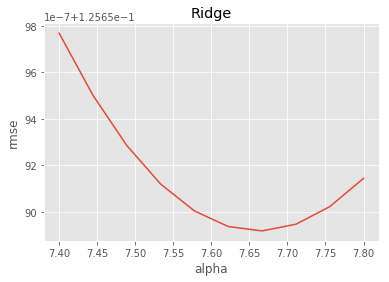

In [18]:
alphas = list(np.linspace(7.4, 7.8, 10))
ridge_model_evaluation(alphas)

In [19]:
model_ridge = Ridge(alpha=7.65)
model_ridge.fit(X, y)
print('CV-20: ', np.mean(rmse_cv(model_ridge)))

CV-20:  0.12565891962811293


# LASSO Regression

In [20]:
model_lasso = Lasso()
def lasso_model_evaluation(alphas):
    cv_ridge = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
    cv_ridge = pd.Series(cv_ridge, index = alphas)
    cv_ridge.plot(title = "Lasso")
    plt.xlabel("alpha")
    plt.ylabel("rmse")
    plt.show()

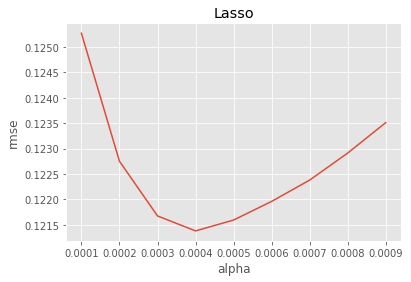

In [21]:
alphas = list(np.arange(0.0001, 0.001, 0.0001))
lasso_model_evaluation(alphas)

In [22]:
model_lasso = Lasso(alpha=0.0004)
model_lasso.fit(X, y)
print('CV-20: ', np.mean(rmse_cv(model_lasso)))

CV-20:  0.12137816022827772


## Decision Trees

In [23]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()

def DTR_model_evaluation(max_depths):
    cv_ridge = [rmse_cv(DecisionTreeRegressor(max_depth = md)).mean() for md in max_depths]
    cv_ridge = pd.Series(cv_ridge, index = max_depths)
    cv_ridge.plot(title = "DecisionTreeRegressor")
    plt.xlabel("max_depth")
    plt.ylabel("rmse")
    plt.show()

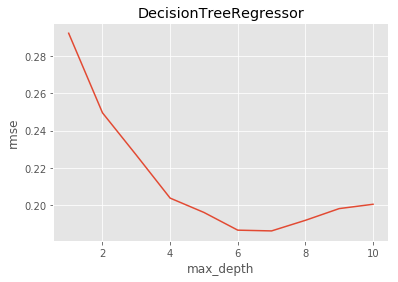

In [24]:
max_depths = list(np.arange(1, 11, 1))
DTR_model_evaluation(max_depths)

In [29]:
model_tree = DecisionTreeRegressor(max_depth=7)
model_tree.fit(X, y)
print('CV-20: ', np.mean(rmse_cv(model_tree)))

CV-20:  0.18785825275839854


## Random Forest

Note: This will take eons to run, the CV score is 0.14ish

In [26]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()

def RFR_model_evaluation(estimatorsL):
    cv_ridge = [rmse_cv(RandomForestRegressor(n_estimators = estimators, n_jobs=-1)).mean() for estimators in estimatorsL]
    cv_ridge = pd.Series(cv_ridge, index = estimatorsL)
    cv_ridge.plot(title = "RandomForestRegressor")
    plt.xlabel("n_estimator")
    plt.ylabel("rmse")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


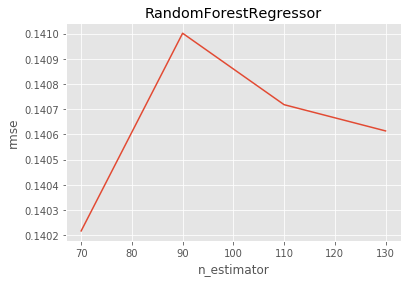

In [27]:
estimatorsL = list(np.arange(70, 150, 20))
RFR_model_evaluation(estimatorsL)

In [28]:
model_forest = RandomForestRegressor(n_estimators=170, n_jobs=-1)
model_forest.fit(X, y)
print('CV-20: ', np.mean(rmse_cv(model_forest)))

CV-20:  0.14064869261604823


## Works Cited

https://www.kaggle.com/sherafgan/lin-r-methods-decision-tree-random-forest-0-121

## Neural Network

https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

# Your Turn!

We are all excited to see what you've done for the Kaggle competition! We would like to go around the room and ask each group what methods you used for the challenge, what challenges you faced, and how well you ultimately did. Please participate, because the groups with the best performing solution will get a prize!

Come up to the podium, plug in your computer, and explain your model on screen.

# INSERT KAGGLE LEADERBOARD STUFF HERE

# Further Reading, Topics

* General model selection techniques: [AIC](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=16&ved=2ahUKEwj05MGkqO_eAhW-JTQIHQl1Cg0QFjAPegQIDBAC&url=http%3A%2F%2Fstatweb.stanford.edu%2F~jtaylo%2Fcourses%2Fstats203%2Fnotes%2Fselection.pdf&usg=AOvVaw3s66HL1yMIZRvy1A5kMW7y), AICc, and BIC
* [Logit and Probit models](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=13&ved=2ahUKEwih9-TjqO_eAhUoHzQIHTJdAwwQFjAMegQICRAC&url=http%3A%2F%2Fwww.columbia.edu%2F~so33%2FSusDev%2FLecture_9.pdf&usg=AOvVaw1IYCAt3W7q8RxZ29oyaYFZ) for categorical linear regression
* [Time Series Models and Analysis](https://otexts.org/fpp2/arima.html)
* [Principal Component Analysis](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
* [XGBoost](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

# That's all folks! 

We've reached the end of a long semester. Getting to know you all and to introduce you to the world of statistical computing has been as much of a journey for us as it has undoubtedly been for many of you. We hope that your participation in SUSA has given you the tools to begin to pursue your goals in statistics and beyond. We can't imagine the things that you'll go on to achieve, but it's our hope that you will continue to pursue those things in SUSA next semester. 

Sincerely,

Your Friends at the Education Committee <3